In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Okt

In [3]:
year_4_data = pd.read_csv("data/4차년도.csv", encoding="cp949")
year_5_data = pd.read_csv("data/5차년도.csv", encoding="cp949")
year_5_data_2 = pd.read_csv("data/5차년도_2차.csv", encoding="cp949")

okt = Okt()

In [4]:
print(f"4 : {len(year_4_data)}, 5_1 : {len(year_5_data)}, 5_2 : {len(year_5_data_2)}")

4 : 14606, 5_1 : 10011, 5_2 : 19374


In [5]:
data = pd.concat((year_4_data,year_5_data,year_5_data_2))
print(len(data))

43991


In [6]:
# 기쁨 : 0, 슬픔 : 1, 화남 : 2, 두려움 : 3, 역겨움 : 4, 중립 : 5, 놀라움 : 6
emot_indexing_dic = {'happiness' : 0, 'sadness' : 1, 'angry' : 2, 'fear' : 3, 'disgust' : 4, 'neutral' : 5, 'surprise' : 6}
emotion_dic = {}
for i, emot in enumerate(data['상황'].unique()):
    emotion_dic[emot] = i
    
print(emotion_dic)

{'anger': 0, 'sad': 1, 'fear': 2, 'disgust': 3, 'neutral': 4, 'happiness': 5, 'sadness': 6, 'angry': 7, 'surprise': 8}


In [11]:
emotion_dic = {'anger': 0, 'sad': 1, 'neutral': 2, 'happiness': 3, 'sadness': 1, 'angry': 0}


In [12]:
emotions = list(emotion_dic)

In [13]:
x_origin = []
y = []
for i in data.iloc:
    if i['상황'] in emotions:
        x_origin.append(i['발화문'])
        y.append(emotion_dic[i['상황']])

In [14]:
x = []
for i in x_origin:
    x.append(okt.morphs(i))

In [15]:
y = np.array(y)

In [16]:
word_num = 10000


tokenizer = Tokenizer(num_words=word_num)
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)
padded_x = pad_sequences(x, padding='post')

In [21]:
padded_x.shape

(33445, 56)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(padded_x, emotion_y, test_size=0.3, random_state=777)

NameError: name 'emotion_y' is not defined

In [29]:
maxlen = padded_x.shape[1]

In [31]:
emotion_y.shape

(43991,)

In [37]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(20000, 300, input_length=56), 
  tf.keras.layers.LSTM(units=50), 
  tf.keras.layers.Dense(9, activation='softmax')
])

es_callback = tf.keras.callbacks.EarlyStopping('val_loss', 0, 3,)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(padded_x, y, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es_callback])

Epoch 1/50
419/419 [==============================] - 61s 141ms/step - loss: 1.1316 - accuracy: 0.4645 - val_loss: 1.8811 - val_accuracy: 0.1997
Epoch 2/50
419/419 [==============================] - 60s 142ms/step - loss: 1.1037 - accuracy: 0.4637 - val_loss: 2.0084 - val_accuracy: 0.2166
Epoch 3/50
419/419 [==============================] - 59s 140ms/step - loss: 1.1022 - accuracy: 0.4674 - val_loss: 1.9165 - val_accuracy: 0.2166
Epoch 4/50
419/419 [==============================] - 59s 140ms/step - loss: 1.0776 - accuracy: 0.4963 - val_loss: 1.8497 - val_accuracy: 0.3099
Epoch 5/50
419/419 [==============================] - 59s 140ms/step - loss: 0.6843 - accuracy: 0.7689 - val_loss: 1.5108 - val_accuracy: 0.3473
Epoch 6/50
419/419 [==============================] - 59s 140ms/step - loss: 0.3170 - accuracy: 0.8902 - val_loss: 1.2150 - val_accuracy: 0.5656
Epoch 7/50
419/419 [==============================] - 59s 141ms/step - loss: 0.2015 - accuracy: 0.9231 - val_loss: 1.0513 - val_ac

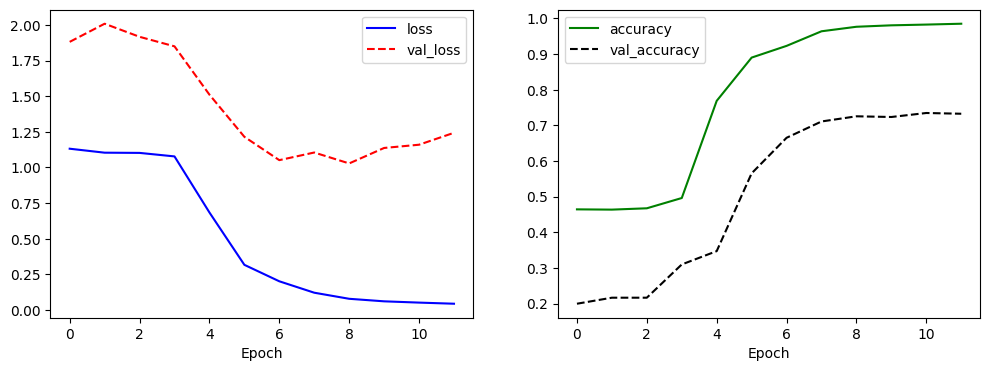

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [40]:
model.save_weights('./checkpoints/my_checkpoint')

In [43]:
test_sentence = '나는 사과만 보면 너무 좋아'
print(1,test_sentence)
test_sentence = [okt.morphs(test_sentence)]
print(2,test_sentence)


test_sentence = tokenizer.texts_to_sequences(test_sentence)
print(3,test_sentence)
test_sentence = pad_sequences(test_sentence, padding='post', maxlen=56)
print(4,test_sentence)

print(model.predict(test_sentence))

1 나는 사과만 보면 너무 좋아
2 [['나', '는', '사과', '만', '보면', '너무', '좋아']]
3 [[4, 17, 360, 45, 529, 7, 213]]
4 [[  4  17 360  45 529   7 213   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]]
1/1 [==============================] - 0s 29ms/step
[[9.9419183e-01 1.4616118e-03 6.7750417e-04 3.6602588e-03 3.3560946e-06
  2.2827874e-06 8.8893142e-07 1.5215405e-06 7.8451512e-07]]
